## Data Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [89]:
# read data
bureau_data = pd.read_csv("IS453 Group Assignment - Bureau Data.csv")
application_data = pd.read_csv("IS453 Group Assignment - Application Data.csv")

In [90]:
bureau_data.info()
bureau_data_copy = bureau_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [91]:
application_data.head()
application_data_copy = application_data.copy()

### Keep these 15 relevant columns for Application Data
- SK_ID_CURR
- TARGET
- FLAG_OWN_CAR
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- NAME_INCOME_TYPE
- DAYS_EMPLOYED
- FLAG_MOBIL
- FLAG_CONT_MOBILE
- CNT_FAM_MEMBERS
- REG_REGION_NOT_LIVE_REGION
- AMT_REQ_CREDIT_BUREAU_MON

In [133]:
relevant_app_data = application_data[['SK_ID_CURR','TARGET','FLAG_OWN_CAR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','DAYS_EMPLOYED','FLAG_MOBIL','FLAG_CONT_MOBILE','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','AMT_REQ_CREDIT_BUREAU_MON']]
relevant_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   FLAG_OWN_CAR                307511 non-null  object 
 3   CNT_CHILDREN                307511 non-null  int64  
 4   AMT_INCOME_TOTAL            307511 non-null  float64
 5   AMT_CREDIT                  307511 non-null  float64
 6   AMT_ANNUITY                 307499 non-null  float64
 7   AMT_GOODS_PRICE             307233 non-null  float64
 8   NAME_INCOME_TYPE            307511 non-null  object 
 9   DAYS_EMPLOYED               307511 non-null  int64  
 10  FLAG_MOBIL                  307511 non-null  int64  
 11  FLAG_CONT_MOBILE            307511 non-null  int64  
 12  CNT_FAM_MEMBERS             307509 non-null  float64
 13  REG_REGION_NOT

### Remove outliers

In [134]:
relevant_app_data.select_dtypes('number').max().map('{:,.0f}'.format)

SK_ID_CURR                        456,255
TARGET                                  1
CNT_CHILDREN                           19
AMT_INCOME_TOTAL              117,000,000
AMT_CREDIT                      4,050,000
AMT_ANNUITY                       258,026
AMT_GOODS_PRICE                 4,050,000
DAYS_EMPLOYED                     365,243
FLAG_MOBIL                              1
FLAG_CONT_MOBILE                        1
CNT_FAM_MEMBERS                        20
REG_REGION_NOT_LIVE_REGION              1
AMT_REQ_CREDIT_BUREAU_MON              27
dtype: object

We see that the max DAYS_EMPLOYED value is above 0 (DAYS_EMPLOYED should be a negative value), and is north of a thousand years, so we find the rows that exceed 0 to discover why this value exists.

In [135]:
# find rows that exceed threshold
relevant_app_data[relevant_app_data['DAYS_EMPLOYED'] > 0]

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,AMT_REQ_CREDIT_BUREAU_MON
8,100011,0,N,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,365243,1,1,2.0,0,0.0
11,100015,0,N,0,38419.155,148365.0,10678.5,135000.0,Pensioner,365243,1,1,2.0,0,0.0
23,100027,0,N,0,83250.000,239850.0,23850.0,225000.0,Pensioner,365243,1,1,2.0,0,0.0
38,100045,0,N,0,99000.000,247275.0,17338.5,225000.0,Pensioner,365243,1,1,2.0,0,0.0
43,100050,0,N,0,108000.000,746280.0,42970.5,675000.0,Pensioner,365243,1,1,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,N,0,202500.000,703728.0,29943.0,607500.0,Pensioner,365243,1,1,1.0,0,1.0
307483,456227,0,N,0,99000.000,247275.0,16479.0,225000.0,Pensioner,365243,1,1,1.0,0,0.0
307487,456231,0,N,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,365243,1,1,2.0,0,0.0
307505,456249,0,N,0,112500.000,225000.0,22050.0,225000.0,Pensioner,365243,1,1,1.0,0,2.0


Actually, we see that the income type is 'Pensioner', which makes sense. 

### Removing car owners
Since we only qualify non-car owners to apply for this loan, we remove car owners from the application. As such, we no longer need the FLAG_OWN_CAR column as they would now all have a value of 'Y' and would bring no further insight. Also, note the columns with missing values.

In [136]:
relevant_app_data = relevant_app_data[relevant_app_data['FLAG_OWN_CAR'] == 'N']
relevant_app_data = relevant_app_data.drop(['FLAG_OWN_CAR'], axis = 1)
relevant_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202924 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  202924 non-null  int64  
 1   TARGET                      202924 non-null  int64  
 2   CNT_CHILDREN                202924 non-null  int64  
 3   AMT_INCOME_TOTAL            202924 non-null  float64
 4   AMT_CREDIT                  202924 non-null  float64
 5   AMT_ANNUITY                 202915 non-null  float64
 6   AMT_GOODS_PRICE             202646 non-null  float64
 7   NAME_INCOME_TYPE            202924 non-null  object 
 8   DAYS_EMPLOYED               202924 non-null  int64  
 9   FLAG_MOBIL                  202924 non-null  int64  
 10  FLAG_CONT_MOBILE            202924 non-null  int64  
 11  CNT_FAM_MEMBERS             202922 non-null  float64
 12  REG_REGION_NOT_LIVE_REGION  202924 non-null  int64  
 13  AMT_REQ_CREDIT

### Removing highly correlated values
Here we normalise and remove highly correlated values, as we learnt in class.

In [137]:
# convert any categorical values into numbered categories

# relevant_app_data['NAME_INCOME_TYPE'].value_counts()
relevant_app_data['NAME_INCOME_TYPE'] = relevant_app_data['NAME_INCOME_TYPE'].astype('category')
cat_columns = relevant_app_data.select_dtypes(['category']).columns
relevant_app_data[cat_columns] = relevant_app_data[cat_columns].apply(lambda x: x.cat.codes)

<AxesSubplot:>

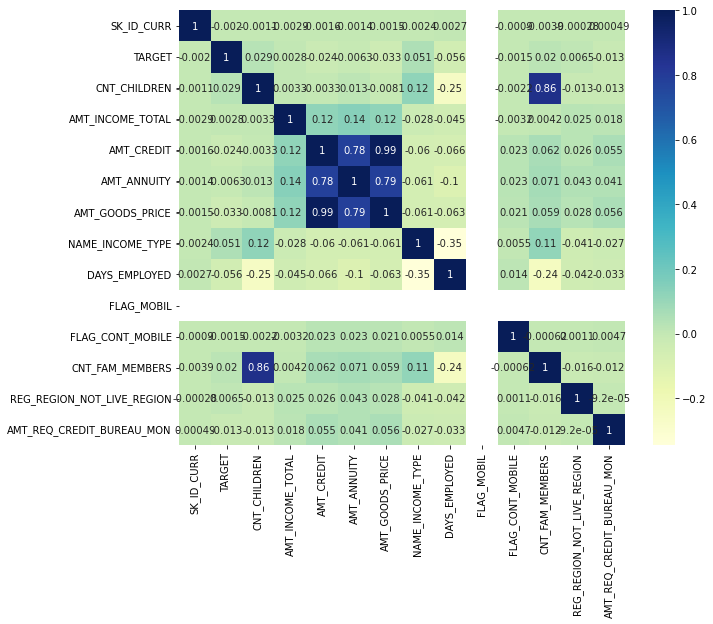

In [142]:
# normalisation
relevant_app_data
normalized_app_data=(relevant_app_data-relevant_app_data.min())/(relevant_app_data.max()-relevant_app_data.min())
normalized_app_data.head()
# correlation
numeric_var = ['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','DAYS_EMPLOYED','FLAG_MOBIL','FLAG_CONT_MOBILE','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','AMT_REQ_CREDIT_BUREAU_MON']
cor = normalized_app_data[numeric_var].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

We see that these pairings have a relatively high correlations:
- AMT_CREDIT and AMT_ANNUITY 
- AMT_CREDIT and AMT_GOODS_PRICE
- CNT_CHILDREN and CNT_FAM_MEMBERS

So, we drop AMT_ANNUITY, AMT_GOODS_PRICE and CNT_FAM_MEMBERS because (1) they have null values as in `relevant_app_data.info()` above, and (2) their counter-part would tell us enough information. 

In [145]:
normalized_app_data = normalized_app_data.drop(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS'], axis = 1)

### Zeroing-in on other null values
As we noticed above, AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS, AMT_REQ_CREDIT_BUREAU_MON have missing values. However, since we've removed the first three columns mentioned, we only look at AMT_REQ_CREDIT_BUREAU_MON.

In [146]:
nan_values_cbm = normalized_app_data[normalized_app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull()]
nan_values_cbm

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_CONT_MOBILE,REG_REGION_NOT_LIVE_REGION,AMT_REQ_CREDIT_BUREAU_MON
3,0.000011,0.0,0.000000,0.000935,0.066837,1.000000,0.037991,NaN,1.0,0.0,NaN
9,0.000028,0.0,0.000000,0.000935,0.089888,1.000000,0.040656,NaN,1.0,0.0,NaN
14,0.000045,0.0,0.000000,0.001396,0.181943,1.000000,0.045399,NaN,1.0,0.0,NaN
17,0.000053,0.0,0.052632,0.000473,0.056180,1.000000,0.045431,NaN,1.0,0.0,NaN
29,0.000090,0.0,0.000000,0.000550,0.033708,1.000000,0.043291,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
307466,0.999862,0.0,0.000000,0.001127,0.138521,0.571429,0.034334,NaN,1.0,0.0,NaN
307501,0.999972,0.0,0.157895,0.000473,0.056067,0.142857,0.043197,NaN,1.0,0.0,NaN
307504,0.999980,0.0,0.000000,0.001089,0.071640,1.000000,0.026970,NaN,1.0,0.0,NaN
307506,0.999989,0.0,0.000000,0.001127,0.052360,1.000000,0.045313,NaN,1.0,0.0,NaN


Null values for AMT_REQ_CREDIT_BUREAU_MON means that no creditors have enquired the Credit Bureau about the applicant within the past month, and as such, we replace it with 0 instead of null.

In [147]:
normalized_app_data['AMT_REQ_CREDIT_BUREAU_MON'] = normalized_app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)

# check if there are still null values in the column
normalized_app_data[normalized_app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull()]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_CONT_MOBILE,REG_REGION_NOT_LIVE_REGION,AMT_REQ_CREDIT_BUREAU_MON


Now, we should have no more null values, and no more correlated variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202924 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  202924 non-null  int64  
 1   TARGET                      202924 non-null  int64  
 2   CNT_CHILDREN                202924 non-null  int64  
 3   AMT_INCOME_TOTAL            202924 non-null  float64
 4   AMT_CREDIT                  202924 non-null  float64
 5   NAME_INCOME_TYPE            202924 non-null  int8   
 6   DAYS_EMPLOYED               202924 non-null  int64  
 7   FLAG_MOBIL                  202924 non-null  int64  
 8   FLAG_CONT_MOBILE            202924 non-null  int64  
 9   REG_REGION_NOT_LIVE_REGION  202924 non-null  int64  
 10  AMT_REQ_CREDIT_BUREAU_MON   173427 non-null  float64
dtypes: float64(3), int64(7), int8(1)
memory usage: 17.2 MB


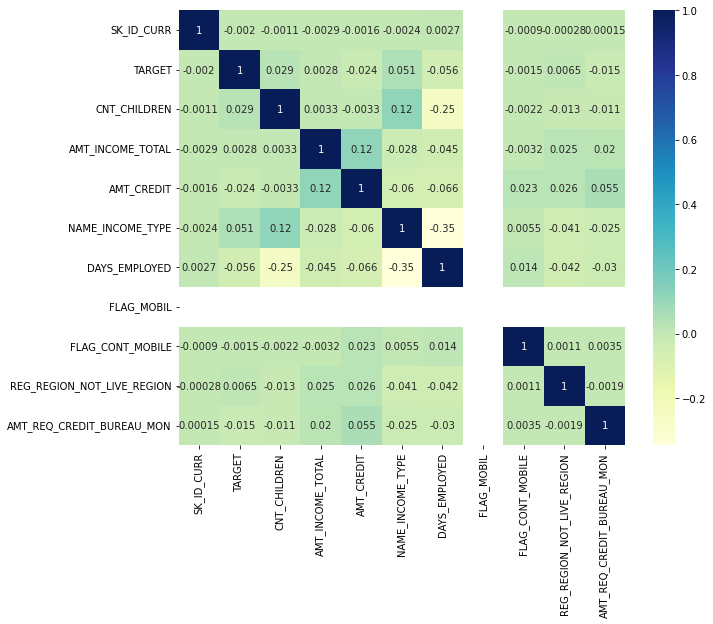

In [148]:
numeric_var = ['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_INCOME_TYPE','DAYS_EMPLOYED','FLAG_MOBIL','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION','AMT_REQ_CREDIT_BUREAU_MON']
cor = normalized_app_data[numeric_var].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)
relevant_app_data.info()